# Imports and Functions (run first)
This notebook was written to run on Google Colaboratory

In [93]:
# Imports for all problems
import numpy as np
from sympy import minimal_polynomial, factor, diff, pprint
from sympy import Matrix, latex, Rational, symbols, simplify, expand, cos, sin, pi, sqrt, acos, Eq, solve, gcd
from sympy.polys.domains import GF
from IPython.display import display, Math
import random

# variable symbols
a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p = symbols('a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p')

def mprint(matrix):
    display(Math(latex(matrix)))

def eprint(matrix):
  """
  pretty print sympy .eigenvects() output
  function takes a matrix
  """
  eigen = matrix.eigenvects()
  for eval, mult, evec in eigen:
    print(f"eigenvalue = {eval}, multiplicity: {mult}")
    mprint(evec[0].T)

def jprint(matrix):
    P, J = matrix.jordan_form()
    display(Math('\quad'.join([latex(P), latex(J)])))

def ansprint(ftext):
    print("*"*35 + "--ANSWER--" + "*"*35 + "\n")
    print(ftext)
    print("\n" + "*"*35 + "--ANSWER--" + "*"*35)

def row_replace(self, x, y, z):
    """
    Replace row x with row_x + y * row_z.
    x: target row index (1st row is 1)
    y: scalar multiplier
    z: source row index (1st row is 1)
    """
    result = self.elementary_row_op(op="n->n+km", row=(x-1), k=y, row1=(z-1))
    return result

def mod_replace(self, x, y, z):
    result = row_replace(self, x, y, z)
    result2 = result.row_mod29(x)
    return result2

def row_scale(self, x, y):
    """
    Scale row x by y
    x: target row index (1st row is 1)
    y: scalar multiplier
    """
    result = self.elementary_row_op(op="n->kn", row=(x-1), k=y)
    return result

def mod_scale(self, x, y):
    result = row_scale(self, x, y)
    result2 = result.row_mod29(x)
    return result2

def row_switch(self, x, y):
    """
    Swap rows x and y.
    x: first row index (1st row is 1)
    y: second row index (1st row is 1)
    """
    result = self.copy()
    result.row_swap(x-1, y-1)
    return result

def row_mod29(self, x):
    """
    perform mod 29 on row x
    """
    result = self.copy()
    result[(x-1), :] = result[(x-1), :] % 29
    return result

# Add row_rep to Matrix class
Matrix.row_replace = row_replace
Matrix.row_scale = row_scale
Matrix.row_switch = row_switch
Matrix.row_mod29 = row_mod29
Matrix.mod_replace = mod_replace
Matrix.mod_scale = mod_scale

<>:27: SyntaxWarning: invalid escape sequence '\q'
<>:27: SyntaxWarning: invalid escape sequence '\q'
/tmp/ipython-input-43485852.py:27: SyntaxWarning: invalid escape sequence '\q'
  display(Math('\quad'.join([latex(P), latex(J)])))


# Exercise 1

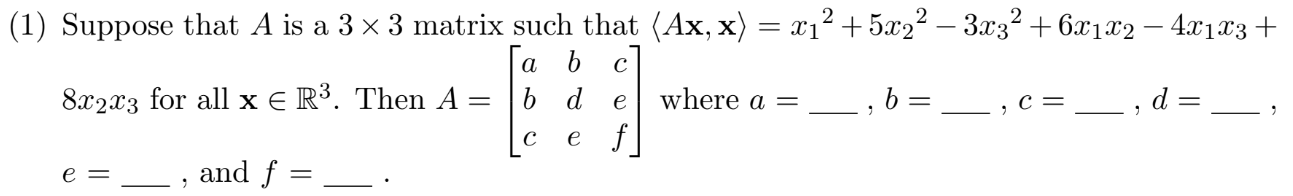

In [ ]:
# x1, x2, x3 across the top and sides, so coeffs are
# x1*x1  x1*x2  x1*x3
# x2*x1  x2*x2  x2*x3
# x3*x1  x3*x2  x3*x3
# remember, the cross terms are added twice so the coeff in the matrix has to be half of the coeff in the equation
ansprint("a=1, b=3, c=-2, d=5, e=4, f=-3")

***********************************--ANSWER--***********************************

a=1, b=3, c=-2, d=5, e=4, f=-3

***********************************--ANSWER--***********************************


# Exercise 2

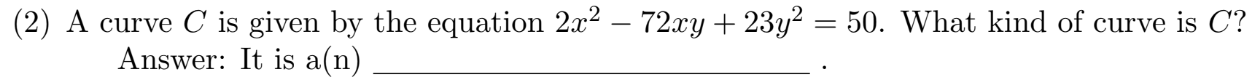

In [ ]:
# Curve based on a, b, c: calculate Delta = b^2 - 4ac (the discriminant)
# Delta = 0: parabola
# Delta < 0: ellipse
# Delta > 0: hyperbola
Delta = 72*72 - 4*2*23
Delta

5000

In [ ]:
ansprint("It is a hyperbola.")

***********************************--ANSWER--***********************************

It is a hyperbola.

***********************************--ANSWER--***********************************


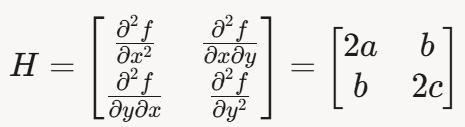

In [ ]:
# the discriminant is related to the Hessian matrix which is just the quadratic terms
# the determinant of the Hessian det(H) is 4ac-b^2, which is the opposite of the discriminant above
# Therefore:
# det(H) = 0, Delta = 0: parabola
# det(H) > 0, Delta < 0: ellipse
# det(H) < 0, Delta > 0: hyperbola

In [ ]:
from sympy import symbols, diff, Matrix

# Define symbols
x, y = symbols('x y')

# Define the quadratic function
f = 2*x**2 - 72*x*y + 23*y**2 - 50

# Compute the Hessian matrix
H = Matrix([[diff(diff(f, x), x), diff(diff(f, x), y)],
                  [diff(diff(f, y), x), diff(diff(f, y), y)]])
print(H.det())
if H.det() == 0:
    print("it's a parabola")
elif H.det() < 0:
    print("it's a hyperbola")
elif H.det() > 0:
    print("it's an ellipse")
else:
    print("something went horribly wrong")

-5000
it's a hyperbola


# Exercise 3

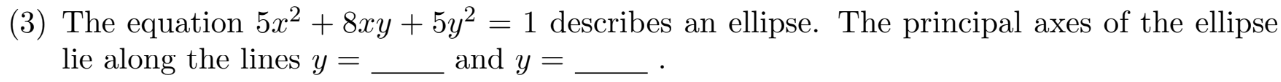

In [ ]:
f = 5*x**2 + 8*x*y + 5*y**2 - 1
f

5*x**2 + 8*x*y + 5*y**2 - 1

In [ ]:
# Compute the Hessian matrix
H = Matrix([[diff(diff(f, x), x), diff(diff(f, x), y)],
                  [diff(diff(f, y), x), diff(diff(f, y), y)]])
print(H.det())
if H.det() == 0:
    print("it's a parabola")
elif H.det() < 0:
    print("it's a hyperbola")
elif H.det() > 0:
    print("it's an ellipse")
else:
    print("something went horribly wrong")

36
it's an ellipse


In [ ]:
H

Matrix([
[10,  8],
[ 8, 10]])

In [ ]:
H.eigenvects()

[(2,
  1,
  [Matrix([
   [-1],
   [ 1]])]),
 (18,
  1,
  [Matrix([
   [1],
   [1]])])]

In [ ]:
sqrt(1/2)

0.707106781186548

In [ ]:
sqrt(1/18)

0.235702260395516

In [ ]:
ansprint("the principal axes lie along y=-x and y=x")

***********************************--ANSWER--***********************************

the principal axes lie along y=-x and y=x

***********************************--ANSWER--***********************************


# Exercise 4

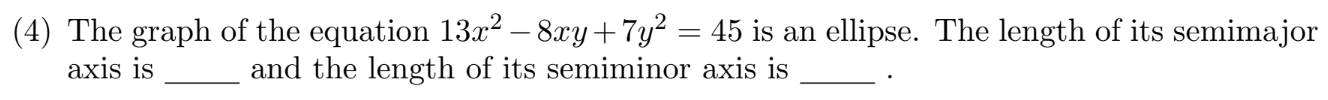

In [13]:
f = 13*x**2 - 8*x*y + 7*y**2 - 45
f

13*x**2 - 8*x*y + 7*y**2 - 45

In [14]:
# Compute the Hessian matrix
H = Matrix([[diff(diff(f, x), x), diff(diff(f, x), y)],
                  [diff(diff(f, y), x), diff(diff(f, y), y)]])
print(H.det())
if H.det() == 0:
    print("it's a parabola")
elif H.det() < 0:
    print("it's a hyperbola")
elif H.det() > 0:
    print("it's an ellipse")
else:
    print("something went horribly wrong")

300
it's an ellipse


In [15]:
# A is the quadratic form matrix
A = H/2; A # use A for getting eigenvectors and eigenvalues

Matrix([
[13, -4],
[-4,  7]])

In [17]:
eprint(A)
jprint(A)

eigenvalue = 5, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 15, multiplicity: 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
# the major axis is the smaller eigenvalue
# length of axes is sqrt(k/eigenvalue) (the scalar term in f)
k = 45
ansprint(f"Semimajor length is {sqrt(k/5)}, semiminor length is {sqrt(k/15)}")

***********************************--ANSWER--***********************************

Semimajor length is 3.00000000000000, semiminor length is 1.73205080756888

***********************************--ANSWER--***********************************


In [ ]:
# to plot in desmos, major axis
# direction x=1/2, y=1, length = sqrt(45/5) = 3
# two equations: 3^2 = y^2 + (y/2)^2
# y = sqrt(36/5), x = sqrt(9/5)
(sqrt(9/5), sqrt(36/5))

(1.34164078649987, 2.68328157299975)

In [ ]:
# to plot in desmos, minor axis
# direction x=-2, y=1, length = sqrt(3)
# two equations: 3 = y^2 + 4y^2
# y = sqrt(3/5), x = -2*sqrt(3/5)
(sqrt(3/5), -2*sqrt(3/5))

(0.774596669241483, -1.54919333848297)

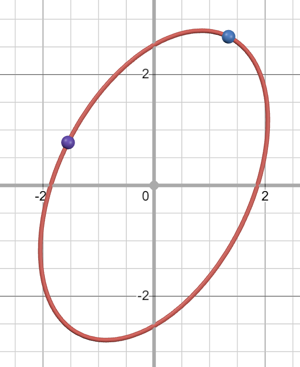

In [ ]:
from PIL import Image as PILImage
from IPython.display import display
img = PILImage.open("/content/drive/MyDrive/UC San Diego Extended Studies/Linear Algebra for Machine Learning/Extra Practice/Erdman Problem Sets/ellipse.png")
# Get original dimensions
original_width, original_height = img.size

# Set target width
target_width = 300

# Calculate target height to maintain aspect ratio
aspect_ratio = original_width / original_height
target_height = int(target_width / aspect_ratio)
img_resized = img.resize((target_width, target_height))
display(img_resized)

# Exercise 5

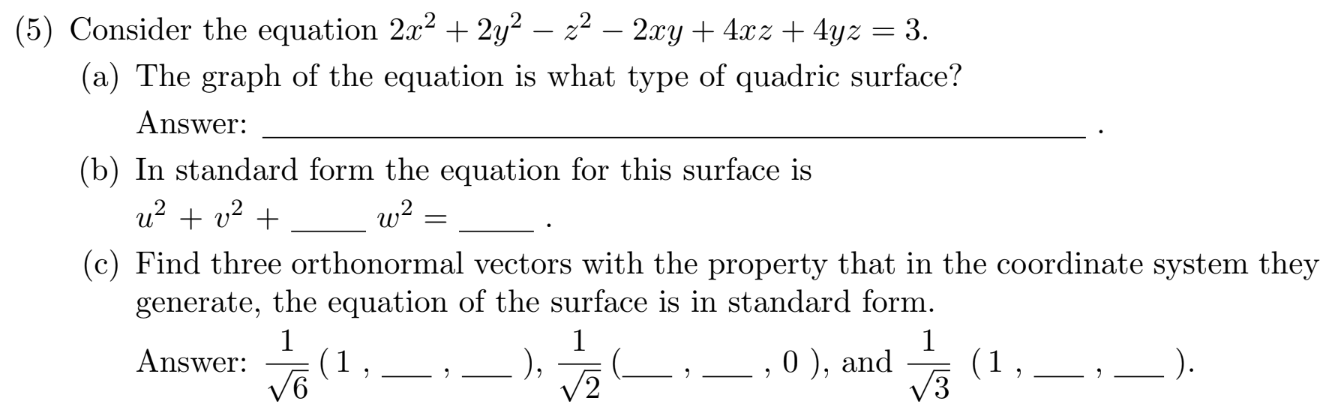

In [4]:
# Define symbols
x, y, z = symbols('x y z')

# Define the quadratic function
f = 2*x*x + 2*y*y - z*z - 2*x*y + 4*x*z + 4*y*z - 3
f

2*x**2 - 2*x*y + 4*x*z + 2*y**2 + 4*y*z - z**2 - 3

In [5]:
# Compute the Hessian matrix
H = Matrix([[diff(diff(f, x), x), diff(diff(f, x), y), diff(diff(f, x), z)],
            [diff(diff(f, y), x), diff(diff(f, y), y), diff(diff(f, y), z)],
            [diff(diff(f, z), x), diff(diff(f, z), y), diff(diff(f, z), z)]])
A = H/2; A

Matrix([
[ 2, -1,  2],
[-1,  2,  2],
[ 2,  2, -1]])

In [12]:
eprint(A)

eigenvalue = -3, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 3, multiplicity: 2


<IPython.core.display.Math object>

In [10]:
jprint(A)

<IPython.core.display.Math object>

In [32]:
# All positive (3 positive): Elliptic (e.g., ellipsoid if non-degenerate).
# All negative (3 negative): Elliptic (e.g., ellipsoid, same as positive due to symmetry).
# Two positive, one negative (or vice versa): Hyperbolic (e.g., hyperboloid of one sheet).
# One positive, two negative (or vice versa): Hyperbolic (e.g., hyperboloid of two sheets).
# Two positive, one zero: Parabolic or cylindrical (e.g., elliptic cylinder).
# One positive, one negative, one zero: Hyperbolic cylinder.
# One positive, two zero: Parabolic cylinder.
# One positive, one negative, one zero: Pair of planes (degenerate).
# All zero: Plane (degenerate, if linear terms dominate).
ansprint("(a) the surface is a hyperboloid of one sheet (2 pos & 1 neg eigenvalues)")

***********************************--ANSWER--***********************************

(a) the surface is a hyperboloid of one sheet (2 pos & 1 neg eigenvalues)

***********************************--ANSWER--***********************************


In [33]:
# I believe the standard form is the converted into the eigenbasis
# If u, v, w are the eigenvectors, then the diagonals of D are the coefficients (3,3,-3)
# I think the scalar value stays the same (3)
# So the standard form is 3u^2 + 3v^2 - 3w^2 = 3
# which simplifies to u^2 + v^2 - w^2 = 1
ansprint("(b) the standard form is u^2 + v^2 - w^2 = 1, so the blanks are -1, 1")
# graphing in desmos 3D confirms the answer

***********************************--ANSWER--***********************************

(b) the standard form is u^2 + v^2 - w^2 = 1, so the blanks are -1, 1

***********************************--ANSWER--***********************************


In [36]:
# the eigenvectors are the columns in the first matrix from jprint(A)
# (-1/2, -1/2, 1)
# (-1, 1, 0)
# (2, 0, 1)
half = Rational(1,2)
e1 = Matrix([-half, -half, 1]).T
e2 = Matrix(np.matrix('-1 1 0'))
e3 = Matrix(np.matrix('2 0 1'))
mprint(e1)
mprint(e2)
mprint(e3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [37]:
e1n, e2n, e3n = Matrix(), Matrix(), Matrix()
elist = [e1, e2, e3]
enlist = [e1n, e2n, e3n]
for e, en in zip(elist,enlist):
    print(e.norm())
    en = e/e.norm()
    mprint(en)

sqrt(6)/2


<IPython.core.display.Math object>

sqrt(2)


<IPython.core.display.Math object>

sqrt(5)


<IPython.core.display.Math object>

In [38]:
# FIRST multiply e1n top and bottom by sqrt(6) and you get -1/sqrt(6), -1/sqrt(6), 2/sqrt(6)
#  multiply by -1 (still orthonormal): 1/sqrt(6), 1/sqrt(6), -2/sqrt(6)
#  separate out 1/sqrt(6) and the first vector is (1, 1, -2)
# SECOND e2n by sqrt(2) top and bottom: -1/sqrt(2), 1/sqrt(2), 0
#  take out 1/sqrt(2) give second vector (-1, 1, 0) or (1, -1, 0)
# THIRD -- is it a type and should be sqrt(5) instead of sqrt(3)?
#  multiply e3n by sqrt(5) top and bottom: 2/sqrt(5), 0, 1/sqrt(5)
#  OR!, the third eigenvector could be a linear combination of the two with the same eigenvalues!
#  what if it was [1,1,1]?
half = Rational(1,2)
e1 = Matrix([-half, -half, 1]).T
e2 = Matrix(np.matrix('-1 1 0'))
e3 = Matrix(np.matrix('1 1 1'))
mprint(e1)
mprint(e2)
mprint(e3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:
e1n, e2n, e3n = Matrix(), Matrix(), Matrix()
elist = [e1, e2, e3]
enlist = [e1n, e2n, e3n]
for e, en in zip(elist,enlist):
    print(e.norm())
    en = e/e.norm()
    mprint(en)

sqrt(6)/2


<IPython.core.display.Math object>

sqrt(2)


<IPython.core.display.Math object>

sqrt(3)


<IPython.core.display.Math object>

In [42]:
# THIRD!  The new one works, e3n time sqrt(3) on top and bottom gives (1,1,1)
ansprint("(c) the vectors are (1,1,-2), (-1,1,0) and (1,1,1)\n    blanks are 1, -2, 1, -1, 1, 1")

***********************************--ANSWER--***********************************

(c) the vectors are (1,1,-2), (-1,1,0) and (1,1,1)
    blanks are 1, -2, 1, -1, 1, 1

***********************************--ANSWER--***********************************


# Exercise 6

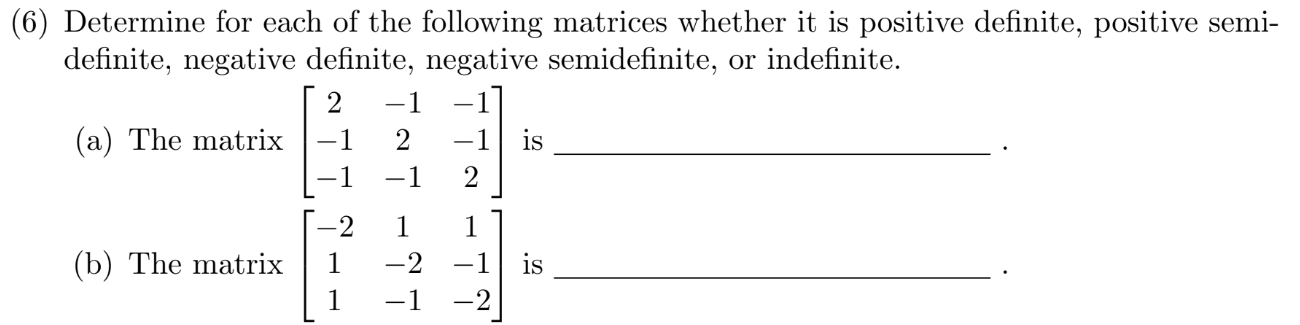

In [44]:
# find the eigenvalues, then the matrix is:
# Positive Definite: All eigenvalues are positive
# Positive Semi-Definite: All eigenvalues are non-negative
# Negative Definite: All eigenvalues are negative
# Negative Semi-Definite: All eigenvalues are non-positive
# Indefinite: There are both positive and negative eigenvalues.
M = Matrix(np.matrix('2 -1 -1;-1 2 -1;-1 -1 2'))
mprint(M)
jprint(M)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [46]:
Mb = Matrix(np.matrix('-2 1 1;1 -2 -1;1 -1 -2'))
mprint(Mb)
jprint(Mb)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
ansprint("(a) Matrix is Positive semi-definite, (b) Matrix is negative definite")

***********************************--ANSWER--***********************************

(a) Matrix is Positive semi-definite, (b) Matrix is negative definite

***********************************--ANSWER--***********************************


# Exercise 7

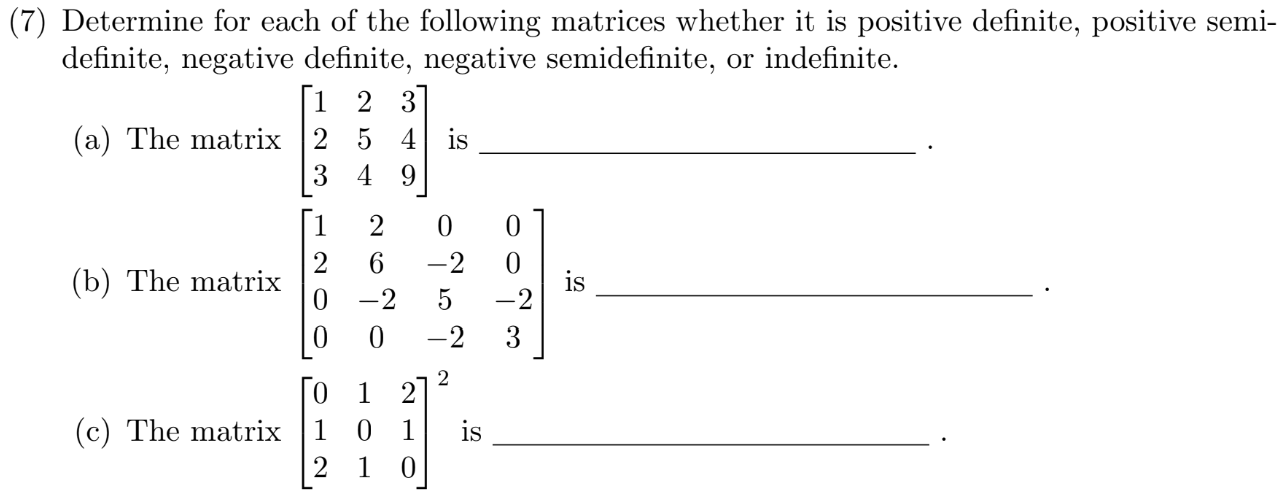

In [ ]:
# find the eigenvalues, then the matrix is:
# Positive Definite: All eigenvalues are positive
# Positive Semi-Definite: All eigenvalues are non-negative
# Negative Definite: All eigenvalues are negative
# Negative Semi-Definite: All eigenvalues are non-positive
# Indefinite: There are both positive and negative eigenvalues.
Ma = Matrix(np.matrix('1 2 3;2 5 4;3 4 9'))
mprint(Ma)
eprint(Ma) # the result is friggin crazy!

In [62]:
floateigenvalues = [x.evalf() for x in Ma.eigenvals().keys()]
floateigenvalues

[12.5923813301844 - 0.e-21*I,
 -0.12540445632372 - 0.e-22*I,
 2.53302312613928 + 0.e-22*I]

In [67]:
np.linalg.eigvals(np.matrix('1 2 3;2 5 4;3 4 9')) # both agree, so (a) is indefinite

array([12.59238133, -0.12540446,  2.53302313])

In [ ]:
Mb = Matrix(np.matrix('1 2 0 0;2 6 -2 0;0 -2 5 -2;0 0 -2 3'))
mprint(Mb)
eprint(Mb)

In [69]:
floateigenvalues = [x.evalf() for x in Mb.eigenvals().keys()]
floateigenvalues

[5.00000000000000,
 8.20060687827349 - 0.e-21*I,
 0.147653003363031 + 0.e-22*I,
 1.65174011836348 - 0.e-22*I]

In [70]:
np.linalg.eigvals(np.matrix('1 2 0 0;2 6 -2 0;0 -2 5 -2;0 0 -2 3')) # both agree, so (b) is positive definite

array([8.20060688, 5.        , 0.147653  , 1.65174012])

In [73]:
Mc = Matrix(np.matrix('0 1 2;1 0 1;2 1 0'))
mprint(Mc)
eprint(Mc)
mprint(Mc@Mc)
eprint(Mc@Mc)

<IPython.core.display.Math object>

eigenvalue = -2, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 1 - sqrt(3), multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 1 + sqrt(3), multiplicity: 1


<IPython.core.display.Math object>

<IPython.core.display.Math object>

eigenvalue = 4, multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 4 - 2*sqrt(3), multiplicity: 1


<IPython.core.display.Math object>

eigenvalue = 2*sqrt(3) + 4, multiplicity: 1


<IPython.core.display.Math object>

In [75]:
floateigenvalues = [x.evalf() for x in (Mc@Mc).eigenvals().keys()] # positive definite
floateigenvalues

[4.00000000000000, 0.535898384862245, 7.46410161513775]

In [76]:
ansprint("(a) indefinite, (b) positive definite, (c) positive definite")

***********************************--ANSWER--***********************************

(a) indefinite, (b) positive definite, (c) positive definite

***********************************--ANSWER--***********************************


# Exercise 8

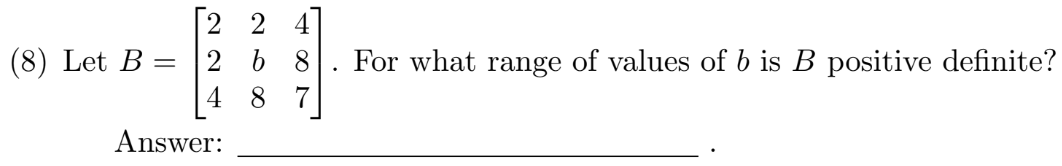

In [77]:
b = symbols('b')
B = Matrix([[2,2,4],[2,b,8],[4,8,7]])
mprint(B)

<IPython.core.display.Math object>

In [97]:
evals = B.eigenvals()
print(type(evals))
eqs = []
for key, val in evals.items():
    print(type(key))
    display(Math(latex(key)))
    eqs.append(key)

<class 'dict'>
<class 'sympy.core.add.Add'>


<IPython.core.display.Math object>

<class 'sympy.core.add.Add'>


<IPython.core.display.Math object>

<class 'sympy.core.add.Add'>


<IPython.core.display.Math object>

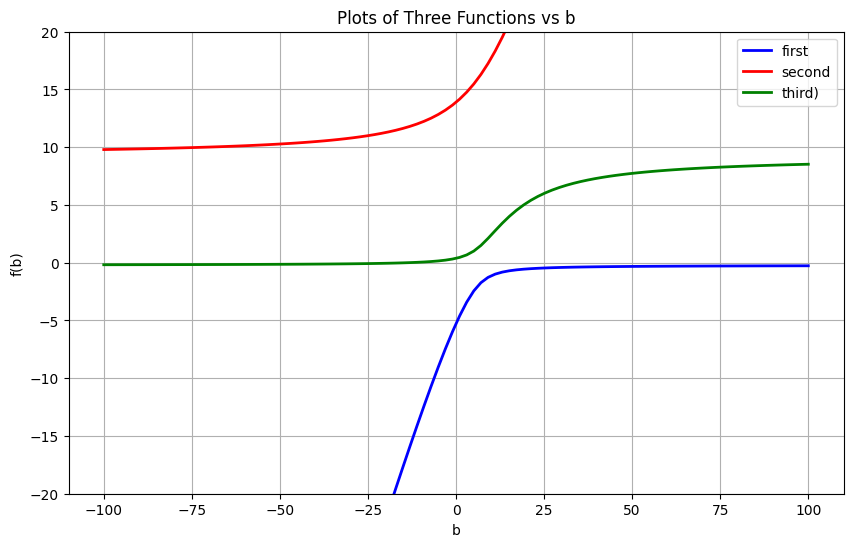

In [127]:
import sympy as sp
import matplotlib.pyplot as plt

# Define the symbolic variable
b = sp.Symbol('b')

# Define three example functions (replace these with your actual functions)
f1 = eqs[0]
f2 = eqs[1]
f3 = eqs[2]

# Define the range of b values (e.g., -10 to 10 with 100 points)
b_values = [float(x) for x in np.linspace(-100, 100, 100)]

# Evaluate each function at the b values
y1_values = [sp.re(sp.N(f1.subs(b, val))) for val in b_values]
y2_values = [sp.re(sp.N(f2.subs(b, val))) for val in b_values]
y3_values = [sp.re(sp.N(f3.subs(b, val))) for val in b_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(b_values, y1_values, color='blue', label='first', linewidth=2)
plt.plot(b_values, y2_values, color='red', label='second', linewidth=2)
plt.plot(b_values, y3_values, color='green', label='third)', linewidth=2)

# Customize the plot
plt.xlabel('b')
plt.ylabel('f(b)')
plt.title('Plots of Three Functions vs b')
plt.grid(True)
plt.ylim(-20,20)
plt.legend()
plt.show()
# all three are never positive because the first never is

In [124]:
# test very large value for b
Btest = Matrix([[2,2,4],[2,10000000,8],[4,8,7]])
mprint(Btest)

<IPython.core.display.Math object>

In [125]:
for key, val in Btest.eigenvals().items():
    print(key.evalf())

10000000.0000068 - 0.e-20*I
-0.216991019234491 - 0.e-21*I
9.21698421922865 + 0.e-17*I


In [128]:
ansprint("There are no values of b that make the matrix positive definite.")

***********************************--ANSWER--***********************************

There are no values of b that make the matrix positive definite.

***********************************--ANSWER--***********************************


# Exercise 9

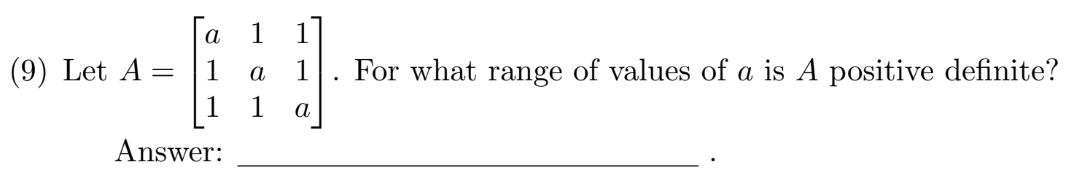

In [130]:
a = symbols('a')
A = Matrix([[a, 1, 1], [1, a, 1], [1, 1, a]])
mprint(A)

<IPython.core.display.Math object>

In [131]:
A.eigenvals()

{a + 2: 1, a - 1: 2}

In [132]:
jprint(A)

<IPython.core.display.Math object>

In [133]:
ansprint("The matrix is positive definite for all values a > 1")

***********************************--ANSWER--***********************************

The matrix is positive definite for all values a > 1

***********************************--ANSWER--***********************************


# Problem 1

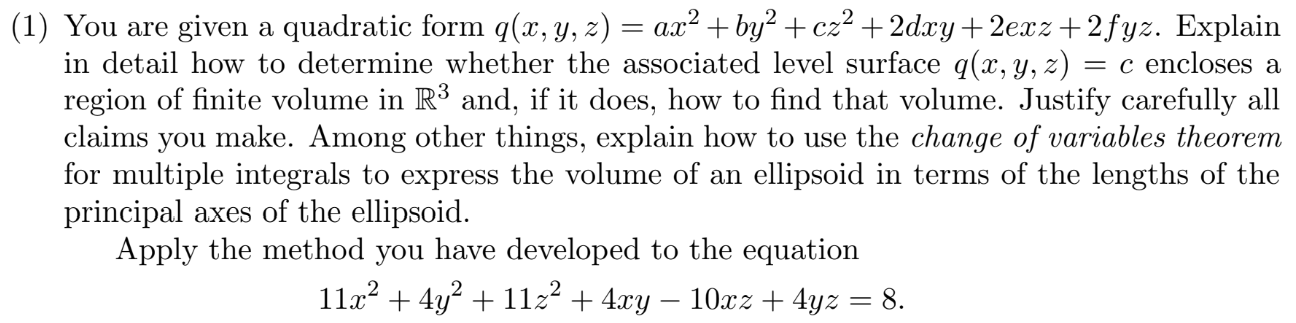

In [134]:
# I believe if a, b and c are all positive (and the scalar is positive), it is an ellipsoid and is a closed surface
# let's find the volume of the equation given
f = 11*x*x + 4*y*y + 11*z*z + 4*x*y - 10*x*z + 4*y*z -8
f

11*x**2 + 4*x*y - 10*x*z + 4*y**2 + 4*y*z + 11*z**2 - 8

In [135]:
# Compute the Hessian matrix
H = Matrix([[diff(diff(f, x), x), diff(diff(f, x), y), diff(diff(f, x), z)],
            [diff(diff(f, y), x), diff(diff(f, y), y), diff(diff(f, y), z)],
            [diff(diff(f, z), x), diff(diff(f, z), y), diff(diff(f, z), z)]])
A = H/2; A

Matrix([
[11, 2, -5],
[ 2, 4,  2],
[-5, 2, 11]])

In [136]:
# get the eigenvalues which will be the lengths along the new axes
jprint(A)

<IPython.core.display.Math object>

In [142]:
# original ellipsoid is in gray
# graphed along the eigenvectors is red
# add the purple points to confirm the axis length calculations
# now find the lengths of the three axes
# x-direction sqrt(8/2) = (2,0,0)
# y-direction sqrt(8/8) = (0,1,0)
# z-direction sqrt(8/16) = (0,1,sqrt(1/2))
area = np.pi*4/3*2*1*sqrt(0.5)
ansprint(f"the area of the ellipsoid is {round(area,3)}")

***********************************--ANSWER--***********************************

the area of the ellipsoid is 5.924

***********************************--ANSWER--***********************************


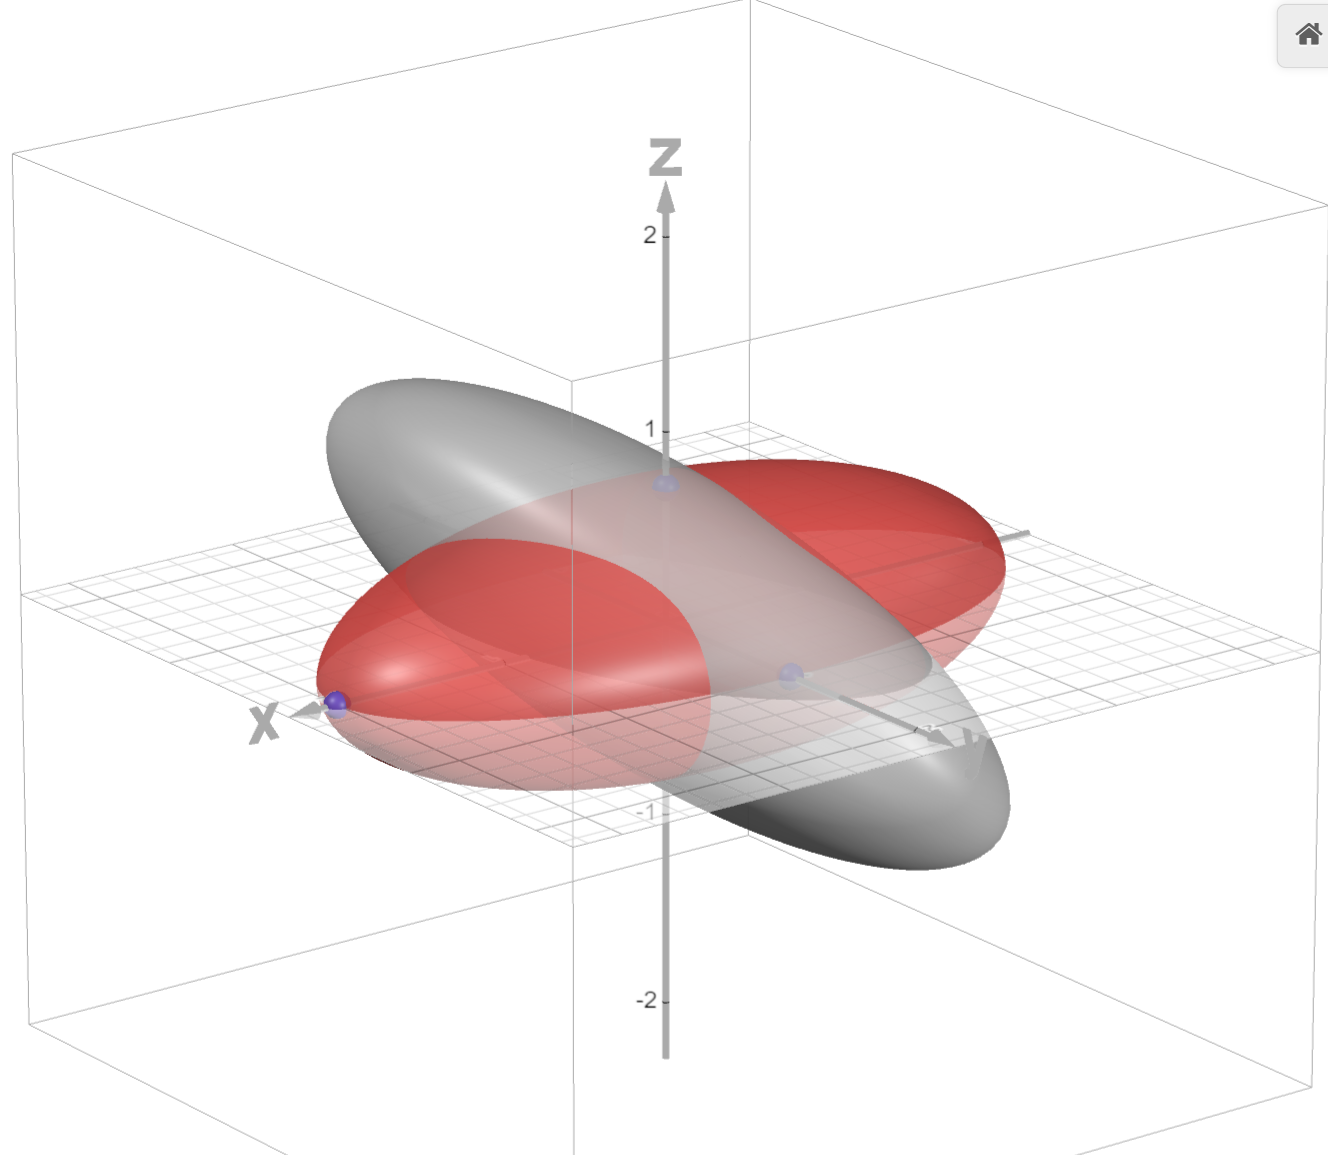